In [7]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    

In [108]:
#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
#m = 1.
#c = 1.
theta_e = 10.
#nu_c = 1
#B = 10.
#e = 1


#constants in Gaussian cgs units (values from harmony)
m = 9.1093826e-28
c = 2.99792458e10
e = 4.80320680e-10
B = 30.0
#n_e = 100000.



#variables to be set (frequency, observer angle, width of delta function, electron number density, 
# sum index n)


theta = np.pi/3.
epsilon = 0.01
n_e = 1
nu_c = e * B / (2. * np.pi * m * c)
nu = 1000000. * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)
n_e_nt = 1.
#p_PL = 2.2
p_PL = 3.
gamma_50_min = 1.
gamma_50_max = 1000.
#gamma_50_max = 100.
C = 1.
n_dn = (nu / nu_c) * abs(np.sin(theta))
Index_cutoff = 0.001
gamma_cutoff = 1000.



In [109]:
def K_I(n, gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    K_xx = M**2 * (special.jv(n, z))**2
    K_yy = N**2 * (special.jvp(n, z, 1))**2
    ans = K_xx + K_yy
    return ans

def K_Q(n, gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    K_xx = M**2 * (special.jv(n, z))**2
    K_yy = N**2 * (special.jvp(n, z, 1))**2
    ans = K_xx - K_yy
    return ans

def K_U(n, gamma):
    a = 0
    return a

def K_V(n, gamma):  
    beta = np.sqrt(1. - 1./gamma**2.)  
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    ans = - 2. * M * N * special.jv(n, z) * special.jvp(n, z, 1)
    return ans


def gamma_up_limit(n):
    gamma_up_nume = (n * nu_c /nu) + np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_up = gamma_up_nume / gamma_deno
    return gamma_up

def gamma_dn_limit(n):
    gamma_dn_nume = (n * nu_c /nu) - np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_dn = gamma_dn_nume / gamma_deno
    return gamma_dn


def power_law_tail_with_cutoff_no_norm(gamma):
    
    f_prefactor = n_e_nt * (p_PL - 1.) / (gamma_50_min**(1. - p_PL) - gamma_50_max**(1. - p_PL))
    f_need_to_be_normalized = gamma**(- p_PL) * np.exp(- gamma/gamma_cutoff)
    f = f_prefactor * f_need_to_be_normalized
    
    return f

def power_law_tail_normalized():
    ans = quad(power_law_tail_with_cutoff_no_norm, 1, np.inf,  epsabs = 0, epsrel = 1e-8)[0]
    return ans

power_law_tail_normalized_value = power_law_tail_normalized()
print 1./power_law_tail_normalized_value


def Operator_D_gamma(gamma):
    
    prefactor = (np.pi*nu/(m * c**2))*(n_e_nt*(p_PL - 1.))/(gamma_50_min**(1. - p_PL) - gamma_50_max**(1. - p_PL))
#    body_1_nume = (- p_PL - 1.) * gamma**(- p_PL - 2.) * np.sqrt(gamma**2 - 1.) - gamma**(- p_PL) * (1./np.sqrt(gamma**2. - 1.))
#    body_1_demo = gamma**2 - 1.
#    body_1_tail = np.exp(- gamma / gamma_cutoff)
#    body_1 = body_1_nume * body_1_demo * body_1_tail
#    body_2_main = gamma**(- p_PL - 1) / np.sqrt(gamma**2 - 1.) 
#    body_2_tail = (- 1. / gamma_cutoff) * np.exp(- gamma / gamma_cutoff)
#    body_2 = body_2_main * body_2_tail
    
    term_1 = (-p_PL-1.)*np.exp(-gamma/gamma_cutoff)*gamma**(-p_PL-2.)/(np.sqrt(gamma**2 - 1.))
    term_2 = np.exp(-gamma/gamma_cutoff)*gamma**(-p_PL-1.)/(gamma_cutoff*np.sqrt(gamma**2 - 1.))
    term_3 = np.exp(-gamma/gamma_cutoff)*gamma**(-p_PL)/((gamma**2 - 1.)**(3./2.))

    f = (1./power_law_tail_normalized_value) * prefactor * (term_1 - term_2 - term_3)
    
    return f

def absorptivity_integrand_62(n, gamma):
    
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
    
#    normalization = 1. / power_law_tail_normalized_value
    prefactor = - c * e**2 / (2. * nu)
    body_1 = gamma**2 * beta
    body_2 = Operator_D_gamma(gamma) * K_I(n, gamma)
    f =  prefactor * body_1 * body_2 * 1./(nu * beta * abs(np.cos(theta)))
    
    return f



def anu_n_integral_62_one(n):
    
#    def jnu_integrand_in_eq62_gamma(gamma):
#        jnu_integrand_62 = jnu_integrand_in_eq62(gamma, n)
#        return jnu_integrand_62
    
    def anu_integrand_in_eq62_gamma_with_cutoff(gamma):
        anu_integrand_62_cutoff = absorptivity_integrand_62(n, gamma)
        return anu_integrand_62_cutoff
    
        
    ans_once = quad(anu_integrand_in_eq62_gamma_with_cutoff, gamma_dn_limit(n), gamma_up_limit(n), epsabs = 0, epsrel = 1e-8)[0]
    
    return ans_once

#def jnu_nonthermal_power_law():
#    ans = 0
#    for i in range(int(n_dn + 1.), int(n_dn + 100000.)):
#        ans = ans + jnu_n_integral_62_one(i)
#    return ans

n_peak = 80000000

def anu_62_integral_from_n_max_to_n_limit(n_max, n_dn):
    
    if(n_max < n_dn):
        n_max = n_dn
    
    ans = quad(anu_n_integral_62_one, n_max, C * n_peak, epsabs = 0, epsrel = 1e-8)[0]
    
    return ans
    

def anu_62_sum_to_n_max_integral_to_n_limit(n_max_sum):
    ans = 0
    for i in range(int(n_dn + 1.), int(1 + n_dn + n_max_sum)):
        ans = ans + anu_n_integral_62_one(i)
#        print ans
        
    total = ans + anu_62_integral_from_n_max_to_n_limit(n_max_sum, n_dn)
    return total







1.00199514442


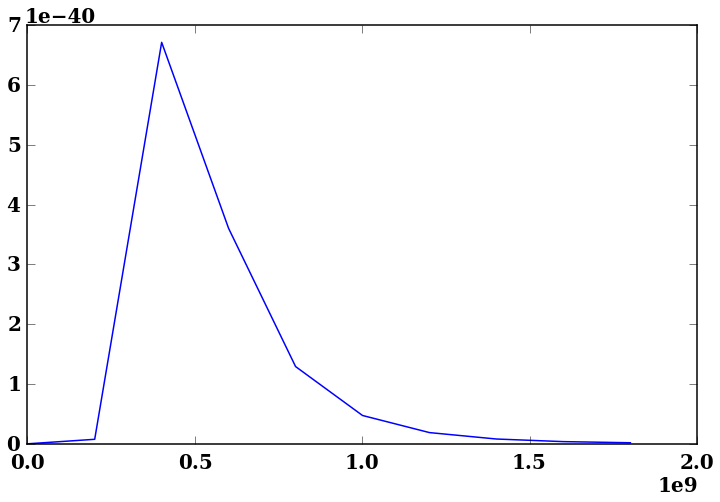

In [110]:
x_value = []
y_value = []
n_max_here = 2000000000

step = int((int(n_max_here))/10.)


for i in xrange(int(n_dn + 1.), int(n_dn + 1. + n_max_here), step):
    x_value = x_value + [i]
    y_value = y_value + [anu_n_integral_62_one(i)]

#    print int(n_dn + 1.), x_value
pl.plot(x_value, y_value)
#pl.ylim([-5, 0])
#print x_value, int(n_dn+1) 
#pl.xlim([0,4000])

In [58]:
n_max = 1000
print anu_62_sum_to_n_max_integral_to_n_limit(n_max)

-3.95557526293e-30


/Users/zbrawei/anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


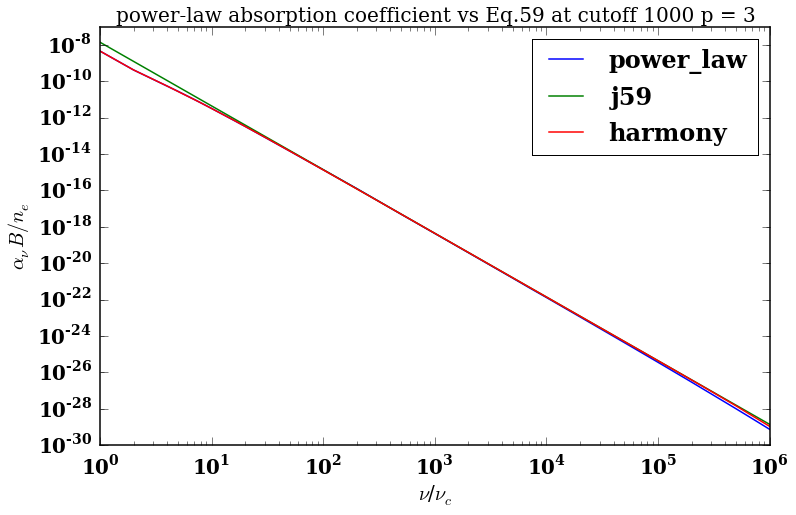

In [74]:
def anu_59(x):
    first_term = n_e_nt * (e**2 / (x * m * c))
    second_term = 3**((p_PL + 1.)/2.) * (p_PL - 1.) / (4. * (gamma_50_min**(1. - p_PL) - gamma_50_max**(1. - p_PL)))
    third_term = special.gamma((3. * p_PL + 2.) / 12.)
    fourth_term = special.gamma((3. * p_PL + 22.) / 12.)
    fifth_term = (x / (nu_c * np.sin(theta)))**(- (p_PL + 2.)/2.)
    ans = first_term * second_term * third_term * fourth_term * fifth_term
    return ans


data_anu_power = np.loadtxt('/Users/zbrawei/Documents/summer_new/my_data_1/power_anu_cut1000_p3.txt')

anu_59_input = data_anu_power[:,0] * nu_c
#anu_59_output = anu_59(data_anu_power[:,0] * nu_c)
#print anu_59_output

pl.loglog(data_anu_power[:,0], data_anu_power[:,1] * B/n_e_nt, label = 'power_law')
pl.loglog(data_anu_power[:,0], anu_59(anu_59_input) * B/n_e_nt, label = 'j59')

#x = np.arange(1, 100, 1)
#pl.loglog(x, anu_59(x), label = 'j59')

data_harmony = np.loadtxt('/Users/zbrawei/Documents/summer_new/iharmony/nonthermal_output_1000_3.txt')
pl.loglog(data_harmony[:, 0], data_harmony[:, 3] * B/n_e_nt * 3.3333333, label = 'harmony')



pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("$\\alpha_\\nu B/n_e$")
pl.title("power-law absorption coefficient vs Eq.59 at cutoff 1000 p = 3")
pl.legend(loc = 'upper right')
pl.show()
#print anu_59(10*nu_c)


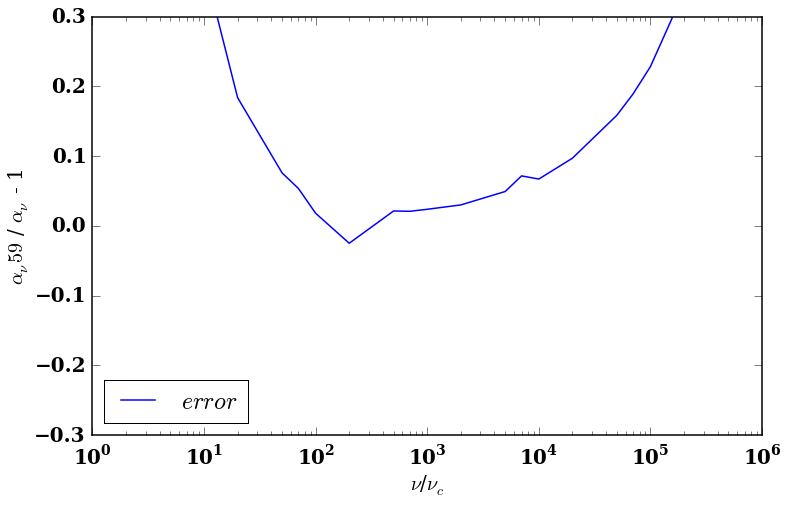

In [5]:
def error_here():
    
    data_x = data_anu_power[:, 0]
    
    ans = anu_59(data_x * nu_c)
    
    error = ans / data_anu_power[:, 1] - 1.
    
    return error 

pl.semilogx(data_anu_power[:, 0], error_here(), label = '$error$')
pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("$\\alpha$$_\\nu59$ / $\\alpha$$_\\nu$ - 1")
pl.ylim([-0.3, 0.3])
pl.legend(loc = 'lower left')
pl.show()


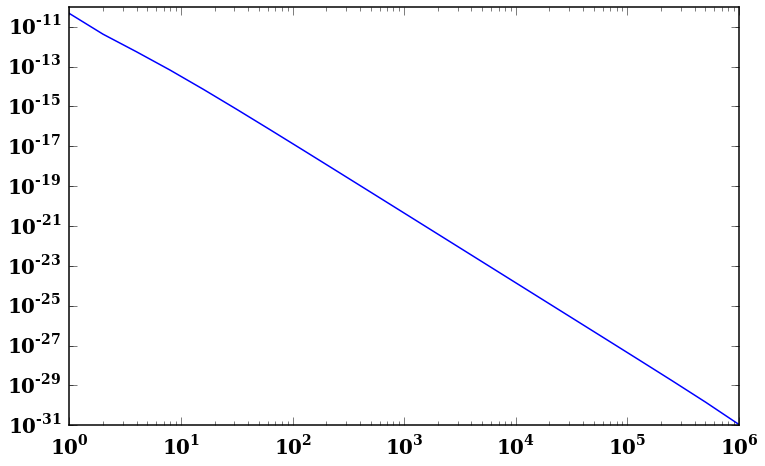